In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
data = pd.read_csv("../../Data/airline_passengers.csv",index_col="Month",parse_dates=True)
data.index.freq = pd.infer_freq(data.index)

data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualize Data

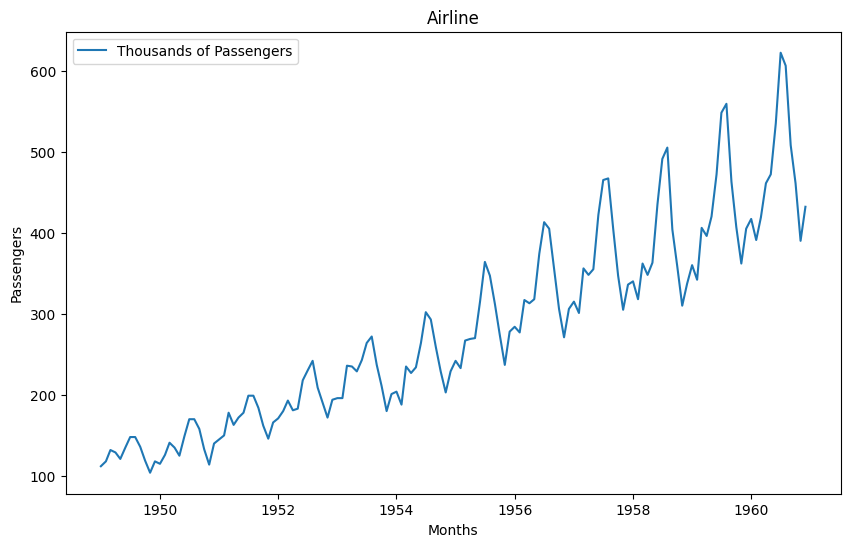

In [9]:
# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(data.index, data["Thousands of Passengers"], label='Thousands of Passengers')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title('Airline')

plt.legend()
plt.show()

Split Data 20-80

In [27]:
trainLength = math.ceil(0.75 * len(data.index))

trainData = data.iloc[:trainLength]
testData = data.iloc[trainLength-1:]

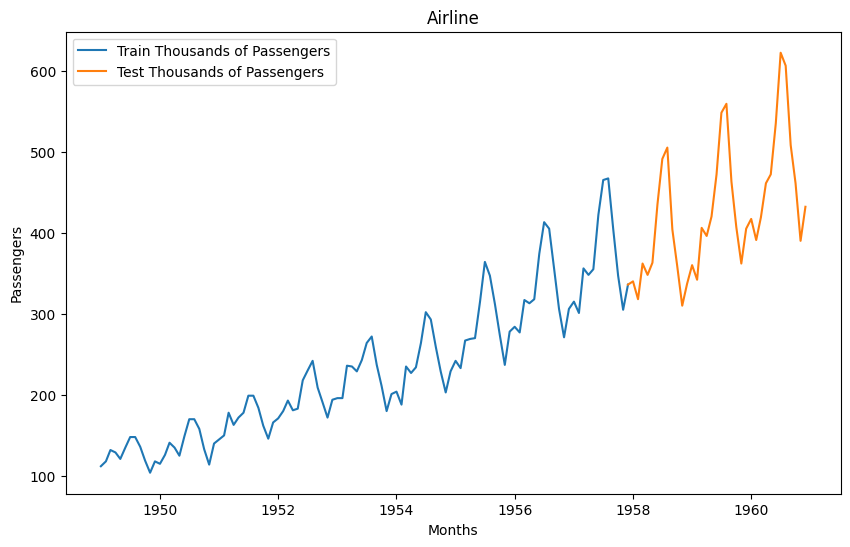

In [28]:
# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(trainData.index, trainData["Thousands of Passengers"], label='Train Thousands of Passengers')
plt.plot(testData.index, testData["Thousands of Passengers"], label='Test Thousands of Passengers')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title('Airline')

plt.legend()
plt.show()

Training with ExpoSmoothing Triple Parameter

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(trainData["Thousands of Passengers"] , trend="mul",seasonal="mul" , seasonal_periods=12).fit()

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [36]:
data["ExpoSmooth"]=values = model.fittedvalues
values.head()

Month
1949-01-01    110.828184
1949-02-01    118.621126
1949-03-01    134.925023
1949-04-01    130.012933
1949-05-01    124.486365
Freq: MS, dtype: float64

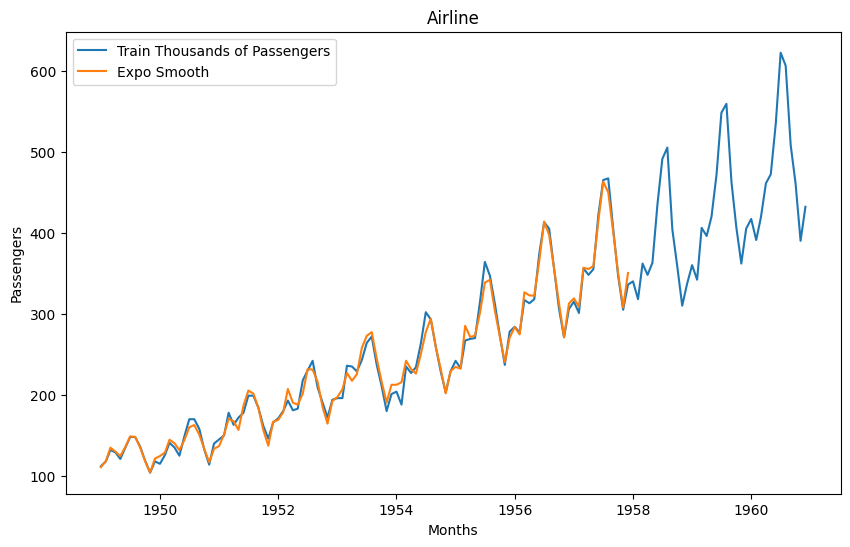

In [37]:
# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(data.index,data["Thousands of Passengers"], label='Train Thousands of Passengers')
plt.plot(data.index, data["ExpoSmooth"], label='Expo Smooth')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title('Airline')

plt.legend()
plt.show()

Forecast

In [48]:
pred_data = model.forecast(37)
data["forecast"] =  pred_data

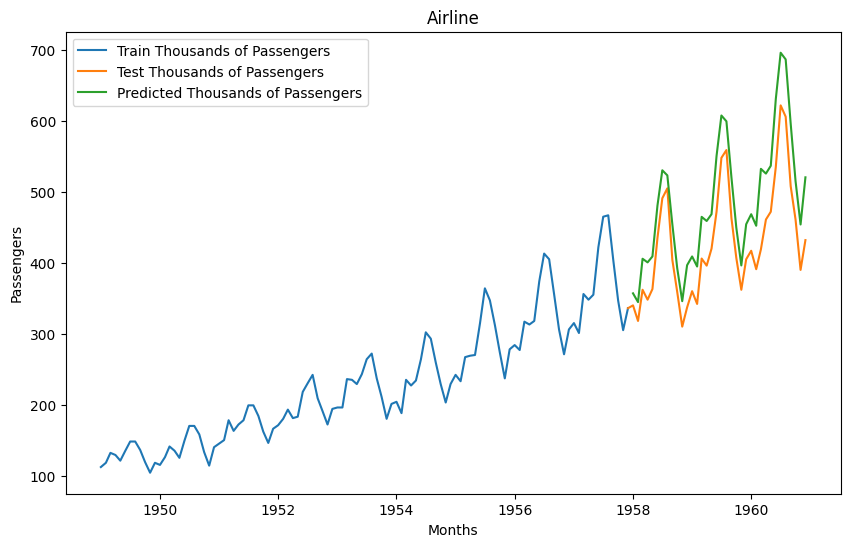

In [49]:
# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(trainData.index, trainData["Thousands of Passengers"], label='Train Thousands of Passengers')
plt.plot(testData.index, testData["Thousands of Passengers"], label='Test Thousands of Passengers')
plt.plot(data.index, data["forecast"], label='Predicted Thousands of Passengers')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.title('Airline')

plt.legend()
plt.show()

Evaluate

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("MSE=",mean_squared_error(testData ,pred_data ))
print("MAE=",mean_absolute_error(testData ,pred_data ))

# RMSE must be below std to be a reasonable model
print("RMSE=",np.sqrt(mean_squared_error(testData ,pred_data )))

MSE= 6808.075147722662
MAE= 67.98633603149396
RMSE= 82.51106075989244


In [54]:
data.describe()

,Thousands of Passengers,ExpoSmooth,forecast
count,144.000000,108.000000,36.000000
mean,280.298611,231.083039,484.198327
std,119.966317,84.656152,90.178517
min,104.000000,104.334562,344.588831
25%,180.000000,159.216805,408.148879
50%,265.500000,216.982494,466.665203
75%,360.500000,283.993466,530.979046
max,622.000000,462.883642,696.242422
